## Lab 5 Assignment: Exploratory Data Analysis with Seaborn

Import the Seaborn library.

In [ ]:
import seaborn as sns

Import the 'titanic' dataset:

In [ ]:
lab2_data = sns.load_dataset('titanic')
lab2_data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Using a bar graph to investigate whether the type of booking (first class, second class, third class) on the Titanic may be related to passengers' mean survival rate:

<Axes: xlabel='class', ylabel='survived'>

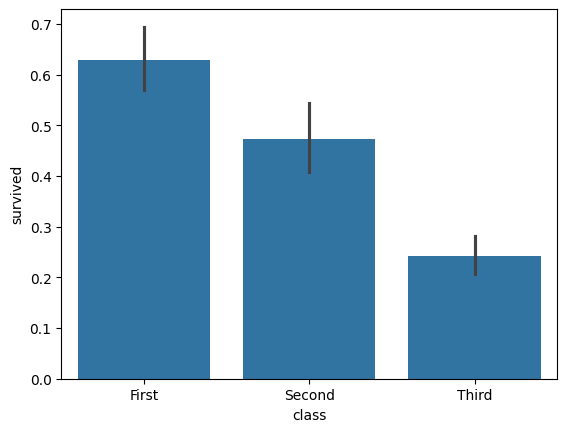

In [ ]:
sns.barplot(data =lab2_data, x='class', y='survived')

Investigating whether an individual was a man, woman, or child could be a factor that influenced passengers' survival rates too.

<Axes: xlabel='class', ylabel='survived'>

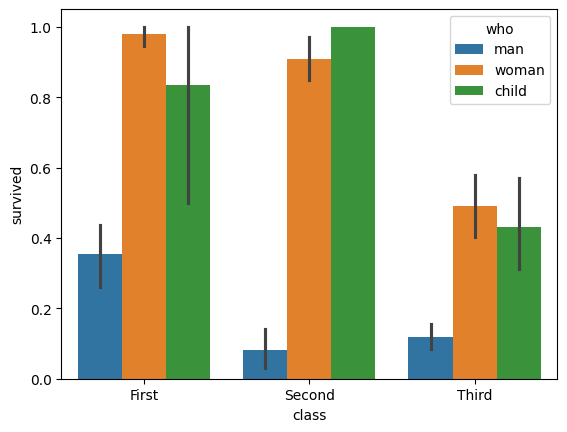

In [ ]:
sns.barplot(data=lab2_data, x="class", y='survived',  hue='who')

It looks there was a significant difference between the survival rates of men vs. women and children regardless of booking.
Analyzing if this type of difference is also present among children by seperating them into boys and girls:

In [ ]:
import pandas as pd
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'male'), 'who'] = 'boy'
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'female'), 'who'] = 'girl'

<Axes: xlabel='class', ylabel='survived'>

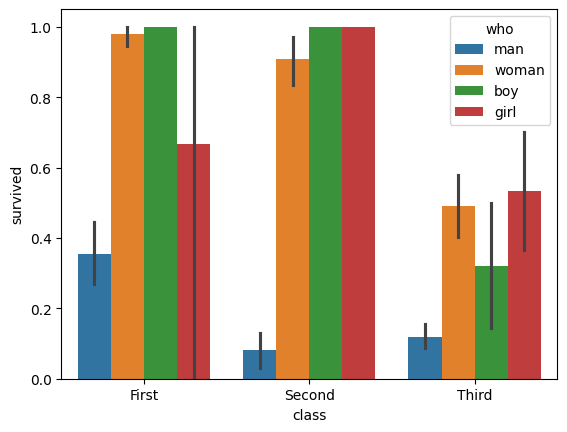

In [ ]:
sns.barplot(data=lab2_data, x="class", y='survived',  hue='who')

Adjusting the graph to the following arbritrary specifications:

 * Error bars should represent 90% confidence intervals
 * The error bars should have whiskers that have a length of 0.05

<Axes: xlabel='class', ylabel='survived'>

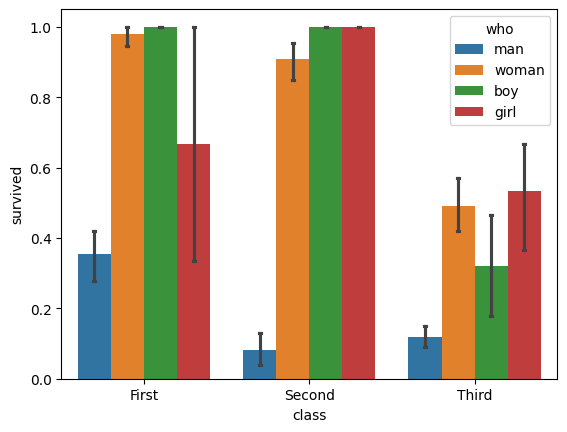

In [ ]:
sns.barplot(data=lab2_data, x="class", y='survived',  hue='who', errorbar=('ci', 90), capsize = 0.05 )

Analyzing the ages of those who survived and those who didn't:

<Axes: xlabel='survived', ylabel='age'>

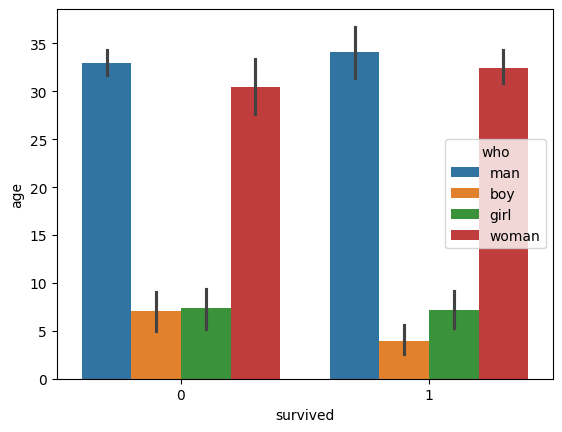

In [ ]:
sns.barplot(data=lab2_data, x='survived', y='age', hue='who')

Renaming the x-axis values of 0 and 1 to 'no' and 'yes' respectively:

In [ ]:
lab2_data['survived'] = lab2_data['survived'].astype(str)
lab2_data.loc[(lab2_data['survived'] == 0), 'survived'] = 'no'
lab2_data.loc[(lab2_data['survived'] == 1),  'survived'] = 'yes'

In [ ]:
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,no,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,yes,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,yes,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,yes,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,no,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,yes,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,no,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,yes,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


<Axes: xlabel='survived', ylabel='age'>

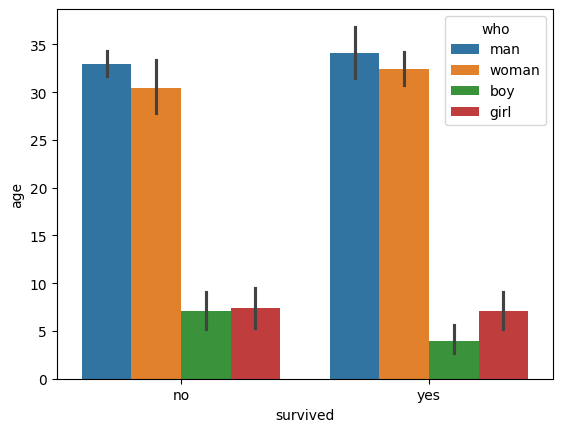

In [ ]:
sns.barplot(data=lab2_data, x='survived', y='age', hue='who')

Adjusting it to the following arbritrary specifications:

 * Error bars should represent standard deviation
 * The error bars should have whiskers that have a length of 0.05
 * Instead of the sample mean, the bars should represent the sample median

In [ ]:
import numpy as np

<Axes: xlabel='survived', ylabel='age'>

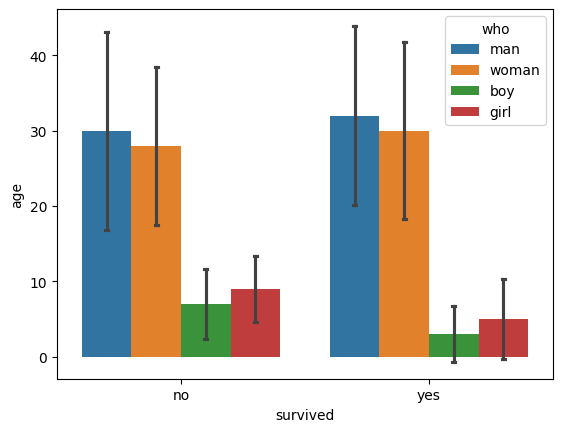

In [ ]:
sns.barplot(data=lab2_data, x='survived', y='age', hue='who', errorbar = 'sd',capsize=0.05, estimator = np.median)

Producing a boxplot:

<Axes: xlabel='survived', ylabel='age'>

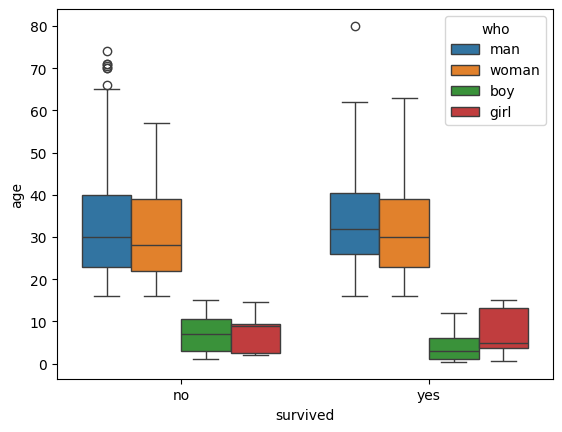

In [ ]:
sns.boxplot(data=lab2_data, x='survived', y='age', hue='who')

Producing a strip plot version of the graph with datapoints that are half-transparent and jitter set to 0.3 .

<Axes: xlabel='survived', ylabel='age'>

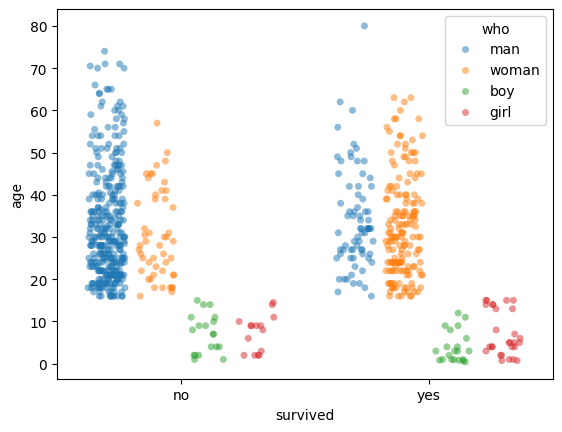

In [ ]:
sns.stripplot(data=lab2_data, x='survived', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true')